# Loading the Data

In [1]:
import pandas as pd

file_path="UnemploymentinIndia.csv"
unemp_data=pd.read_csv(file_path)

unemp_data.head(),unemp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
 7   Unnamed: 7                               0 non-null      float64
 8   Unnamed: 8                               0 non-null      float64
 9   Unnamed: 9                               0 non-null      float64
 10  Unnamed: 10                              0 non-nul

(           Region        Date Frequency  Estimated Unemployment Rate (%)  \
 0  Andhra Pradesh  31-05-2019   Monthly                             3.65   
 1  Andhra Pradesh  30-06-2019   Monthly                             3.05   
 2  Andhra Pradesh  31-07-2019   Monthly                             3.75   
 3  Andhra Pradesh  31-08-2019   Monthly                             3.32   
 4  Andhra Pradesh  30-09-2019   Monthly                             5.17   
 
    Estimated Employed  Estimated Labour Participation Rate (%)   Area  \
 0          11999139.0                                    43.24  Rural   
 1          11755881.0                                    42.05  Rural   
 2          12086707.0                                    43.50  Rural   
 3          12285693.0                                    43.97  Rural   
 4          12256762.0                                    44.68  Rural   
 
    Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 16  Unnamed: 17  \
 0         NaN   

# Clean the Data

In [2]:
unemp_data_cleaned=unemp_data.drop(columns=[col for col in unemp_data.columns if "Unnamed" in col])

unemp_data_cleaned=unemp_data_cleaned.dropna()

unemp_data_cleaned.head(), unemp_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


(           Region        Date Frequency  Estimated Unemployment Rate (%)  \
 0  Andhra Pradesh  31-05-2019   Monthly                             3.65   
 1  Andhra Pradesh  30-06-2019   Monthly                             3.05   
 2  Andhra Pradesh  31-07-2019   Monthly                             3.75   
 3  Andhra Pradesh  31-08-2019   Monthly                             3.32   
 4  Andhra Pradesh  30-09-2019   Monthly                             5.17   
 
    Estimated Employed  Estimated Labour Participation Rate (%)   Area  
 0          11999139.0                                    43.24  Rural  
 1          11755881.0                                    42.05  Rural  
 2          12086707.0                                    43.50  Rural  
 3          12285693.0                                    43.97  Rural  
 4          12256762.0                                    44.68  Rural  ,
 None)

# Exploratory Data Analysis

In [3]:
#1. Unemployment Rate over time

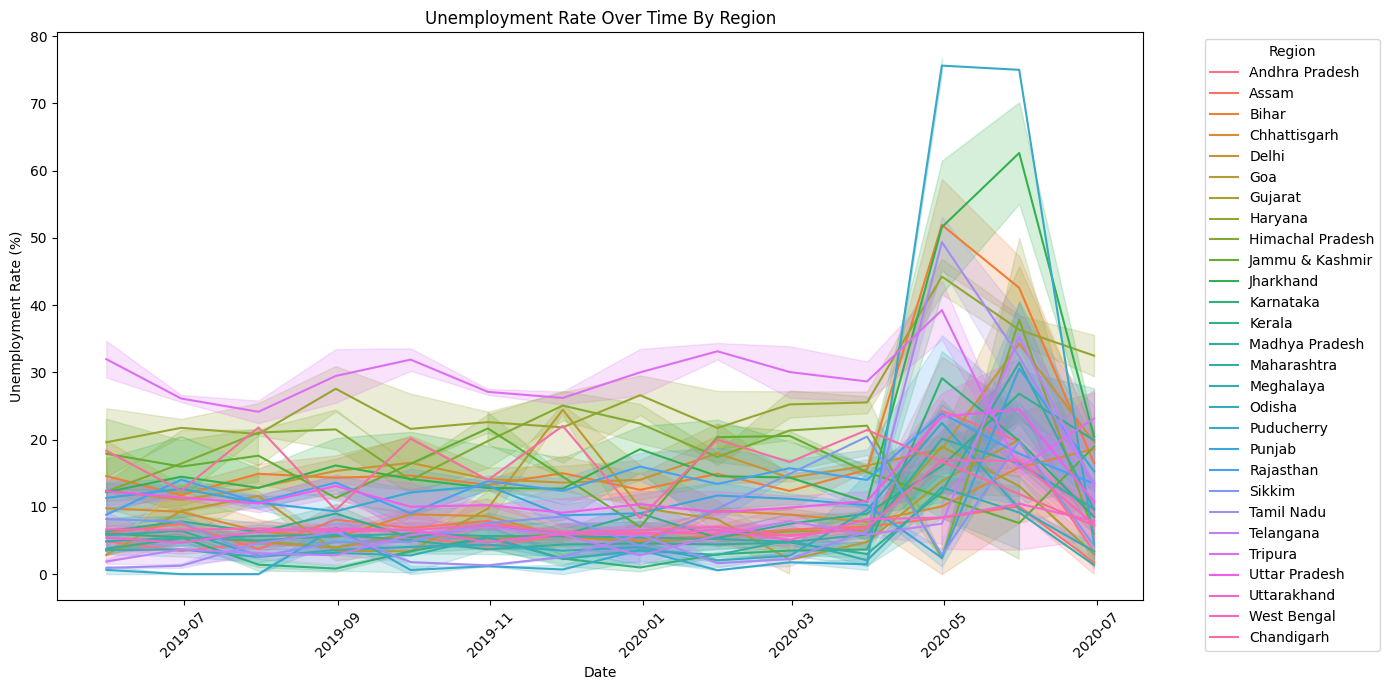

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

unemp_data_cleaned['Date']=pd.to_datetime(unemp_data_cleaned['Date'], format='%d-%m-%Y')

plt.figure(figsize=(14,7))
sns.lineplot(data=unemp_data_cleaned,x='Date',y='Estimated Unemployment Rate (%)',hue='Region')
plt.title('Unemployment Rate Over Time By Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Region',bbox_to_anchor=(1.05,1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Unemployment_Rate_over_time.png')
plt.show()

In [5]:
#2. Regional Unemployment Rate

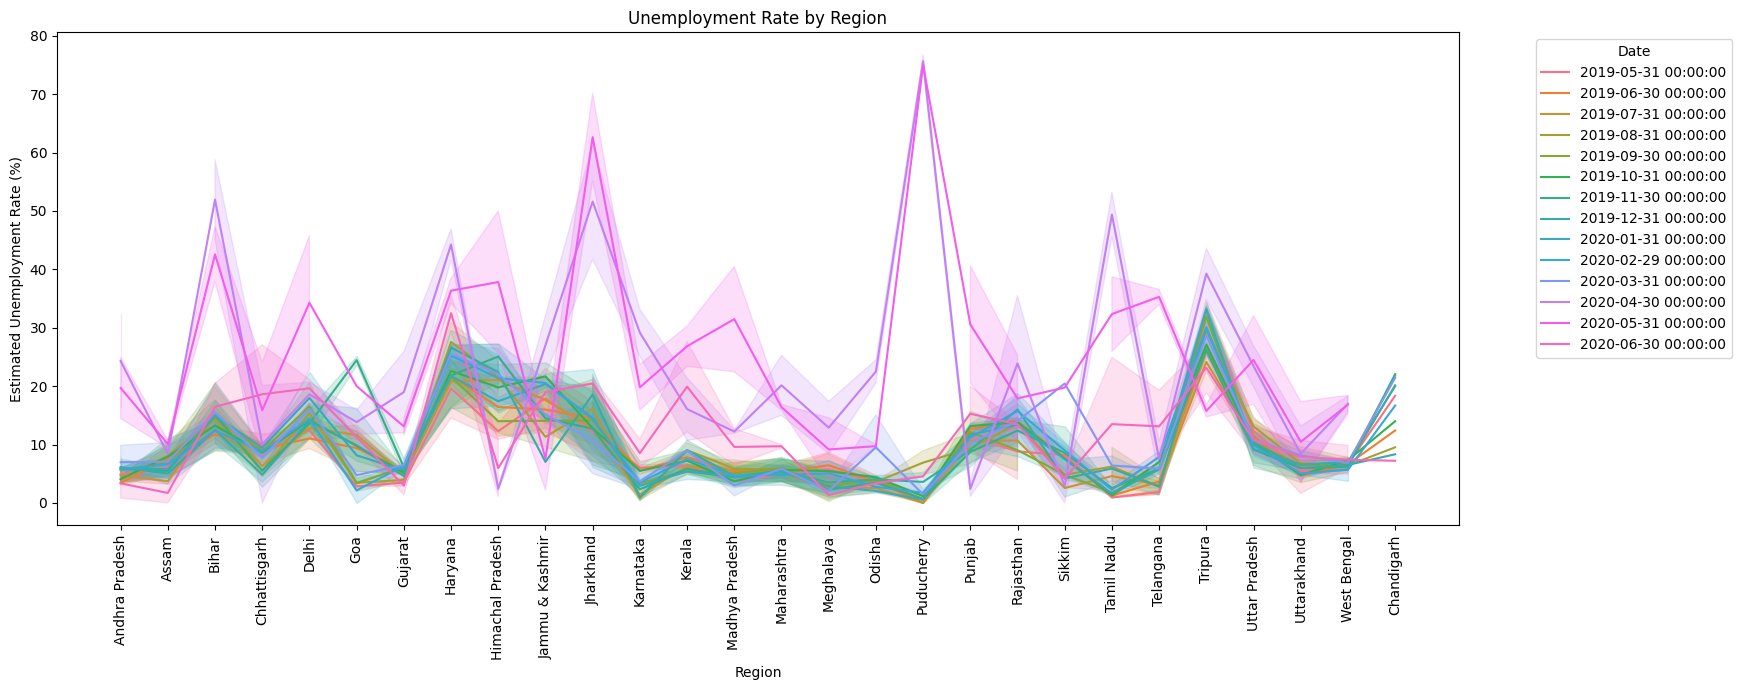

In [6]:
plt.figure(figsize=(17.5,7))
sns.lineplot(data=unemp_data_cleaned,x='Region',y='Estimated Unemployment Rate (%)',hue='Date')
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.legend(title='Date',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.savefig('Regional_Unemployement_Rate.png')
plt.show()

In [7]:
#Urban vs Rural Unemployemnet Rate

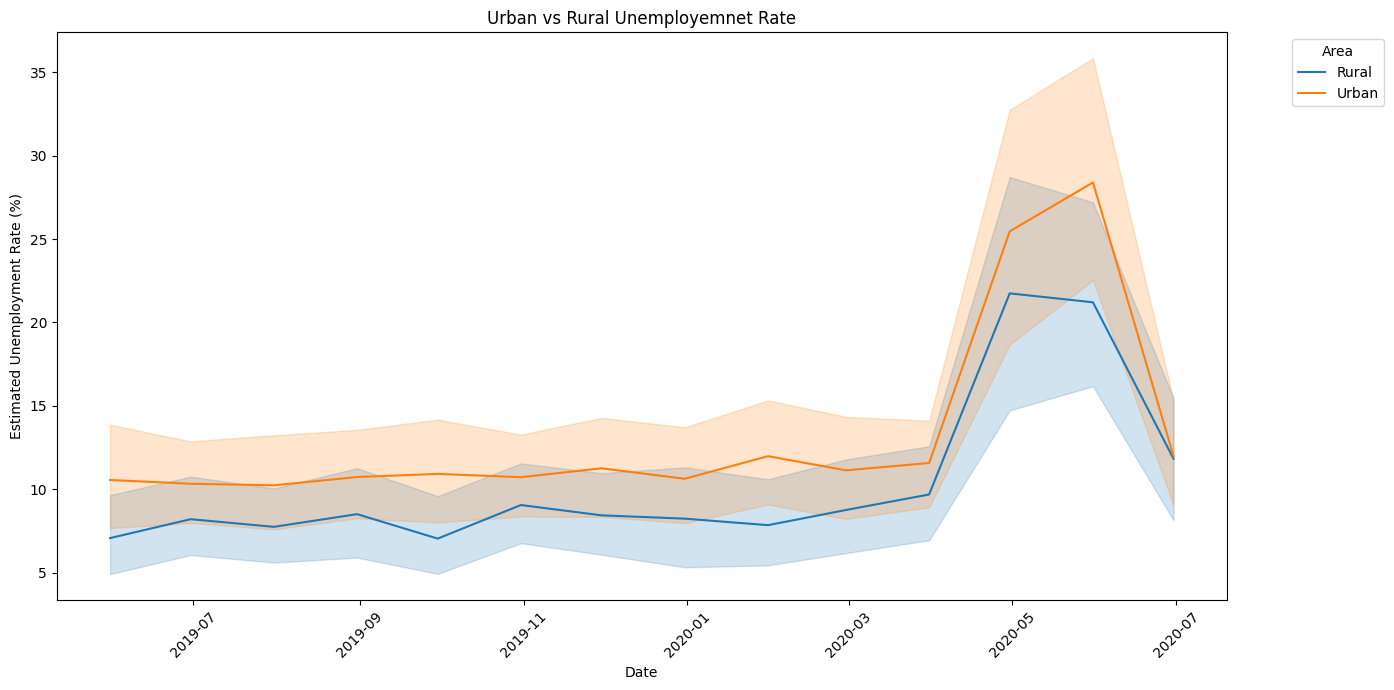

In [8]:
plt.figure(figsize=(14,7))
sns.lineplot(data=unemp_data_cleaned,x='Date',y='Estimated Unemployment Rate (%)',hue='Area')
plt.title('Urban vs Rural Unemployemnet Rate')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Area',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.savefig('Urban_vs_Rural_Unemployemnet_Rate.png')
plt.show()

In [9]:
# Labour Participation Rate

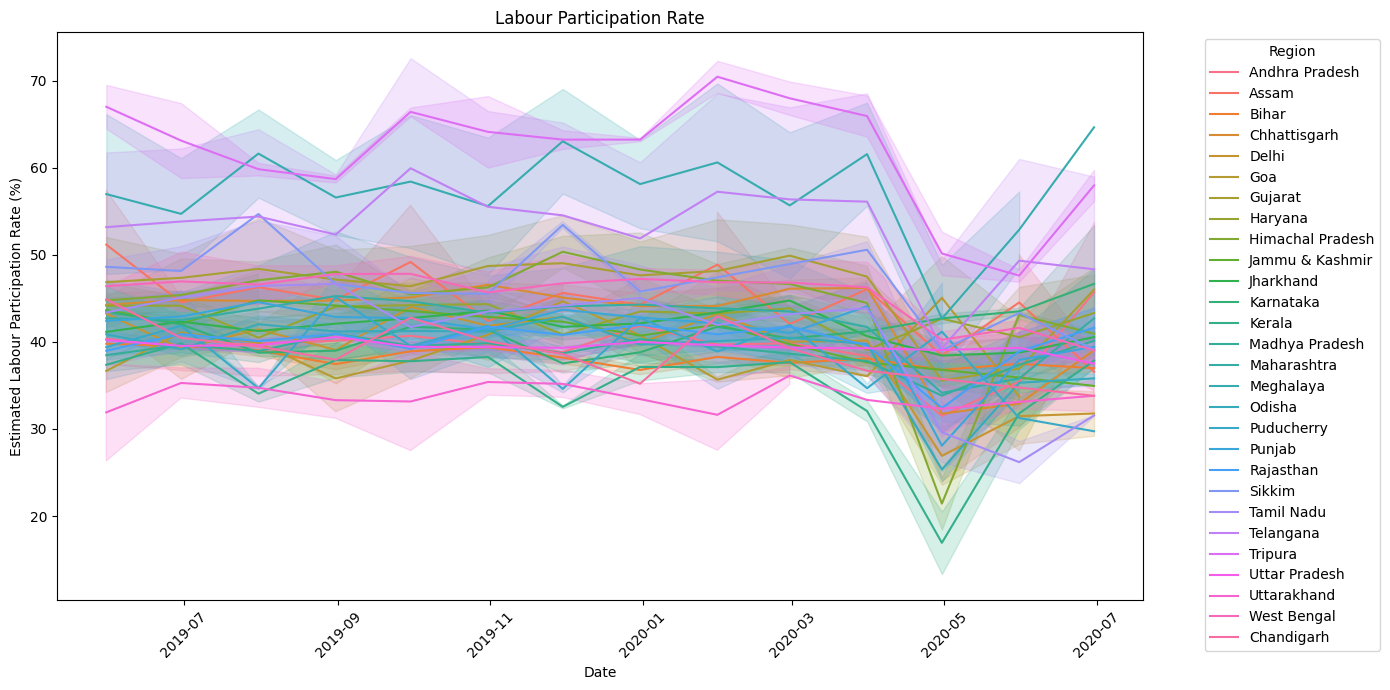

In [10]:
plt.figure(figsize=(14,7))
sns.lineplot(data=unemp_data_cleaned,x='Date',y='Estimated Labour Participation Rate (%)',hue='Region')
plt.title('Labour Participation Rate')
plt.xlabel('Date')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Region',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.savefig('Labour_Participation_Rate.png')
plt.show()

In [11]:
# Correlation Analysis

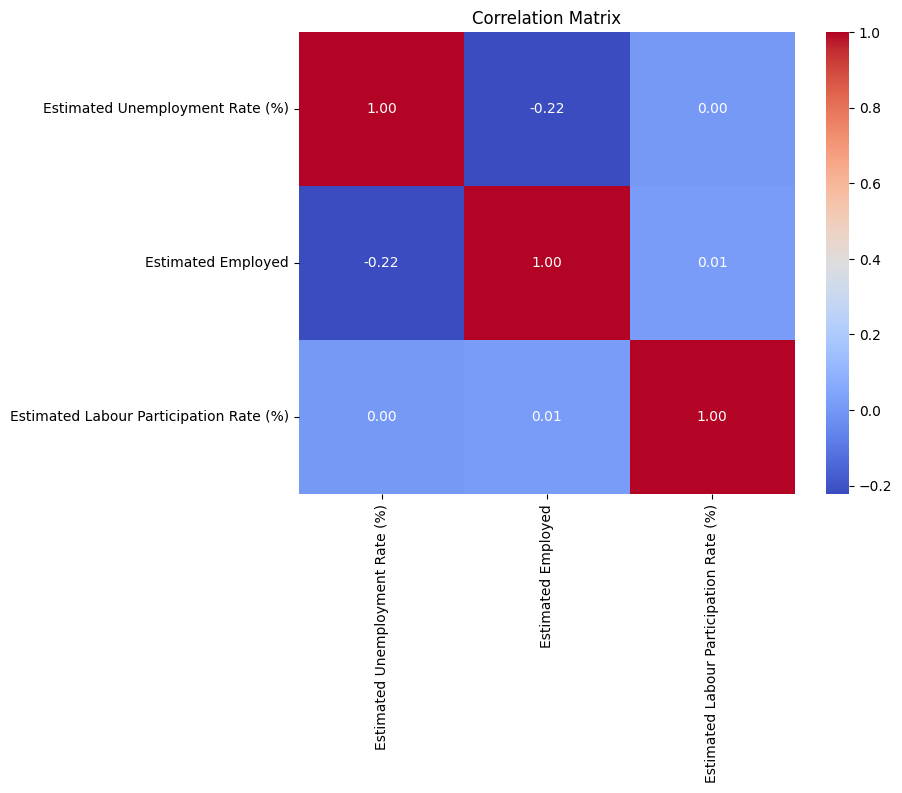

In [12]:
correlation_matrix = unemp_data_cleaned[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('Correlation_Analysis.png')
plt.show()

# Model Building

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X=unemp_data_cleaned[['Estimated Employed','Estimated Labour Participation Rate (%)']]
y=unemp_data_cleaned['Estimated Unemployment Rate (%)']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
#train the model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred=model.predict(X_test)

# Evaluation

In [18]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [19]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 139.07514553297295
R-squared: 0.03938840314253944
